In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Import the dataset
final = pd.read_excel("mnths.xlsx",index_col=0,parse_dates=True)
final.head()

bikes rented
date                    
2011-01-01         38189
2011-02-01         48215
2011-03-01         64045
2011-04-01         94870
2011-05-01        135821

In [6]:
final = final.sort_values(by=['date'])
final

bikes rented
date                    
2011-01-01         38189
2011-02-01         48215
2011-03-01         64045
2011-04-01         94870
2011-05-01        135821
2011-06-01        143512
2011-07-01        141341
2011-08-01        136691
2011-09-01        127418
2011-10-01        123511
2011-11-01        102167
2011-12-01         87323
2012-01-01         96744
2012-02-01        103137
2012-03-01        164875
2012-04-01        174224
2012-05-01        195865
2012-06-01        202830
2012-07-01        203607
2012-08-01        214503
2012-09-01        218573
2012-10-01        198841
2012-11-01        152664
2012-12-01        123713

In [7]:
final = final['bikes rented'].resample('MS').sum()
print(final)

date
2011-01-01     38189
2011-02-01     48215
2011-03-01     64045
2011-04-01     94870
2011-05-01    135821
2011-06-01    143512
2011-07-01    141341
2011-08-01    136691
2011-09-01    127418
2011-10-01    123511
2011-11-01    102167
2011-12-01     87323
2012-01-01     96744
2012-02-01    103137
2012-03-01    164875
2012-04-01    174224
2012-05-01    195865
2012-06-01    202830
2012-07-01    203607
2012-08-01    214503
2012-09-01    218573
2012-10-01    198841
2012-11-01    152664
2012-12-01    123713
Freq: MS, Name: bikes rented, dtype: int64


In [8]:
final.shape

(24,)

In [9]:
# reframe as supervised learning
# lab observation (t-1) is the input variable and t is the output variable.
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [10]:
# Create 12 months of lag values to predict current observation
# Shift of 12 months in this case
df = pd.DataFrame()
for i in range(12,0,-1):
    df['t-'+str(i)] = final.shift(i)
print(df)

                t-12      t-11      t-10       t-9       t-8       t-7  \
date                                                                     
2011-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2011-02-01       NaN       NaN       NaN       NaN       NaN       NaN   
2011-03-01       NaN       NaN       NaN       NaN       NaN       NaN   
2011-04-01       NaN       NaN       NaN       NaN       NaN       NaN   
2011-05-01       NaN       NaN       NaN       NaN       NaN       NaN   
2011-06-01       NaN       NaN       NaN       NaN       NaN       NaN   
2011-07-01       NaN       NaN       NaN       NaN       NaN       NaN   
2011-08-01       NaN       NaN       NaN       NaN       NaN   38189.0   
2011-09-01       NaN       NaN       NaN       NaN   38189.0   48215.0   
2011-10-01       NaN       NaN       NaN   38189.0   48215.0   64045.0   
2011-11-01       NaN       NaN   38189.0   48215.0   64045.0   94870.0   
2011-12-01       NaN   38189.0   48215

In [11]:
# Create column t (original column)
df['t'] = final.values
print(df.head(13))

               t-12     t-11     t-10      t-9       t-8       t-7       t-6  \
date                                                                           
2011-01-01      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
2011-02-01      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
2011-03-01      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
2011-04-01      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
2011-05-01      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
2011-06-01      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
2011-07-01      NaN      NaN      NaN      NaN       NaN       NaN   38189.0   
2011-08-01      NaN      NaN      NaN      NaN       NaN   38189.0   48215.0   
2011-09-01      NaN      NaN      NaN      NaN   38189.0   48215.0   64045.0   
2011-10-01      NaN      NaN      NaN  38189.0   48215.0   64045.0   94870.0   
2011-11-01      NaN      NaN  38189.0  4

In [12]:
# Create a new subsetted dataframe, removing Nans from first 12 rows
df_final = df.dropna()
print(df_final)

                t-12      t-11      t-10       t-9       t-8       t-7  \
date                                                                     
2012-01-01   38189.0   48215.0   64045.0   94870.0  135821.0  143512.0   
2012-02-01   48215.0   64045.0   94870.0  135821.0  143512.0  141341.0   
2012-03-01   64045.0   94870.0  135821.0  143512.0  141341.0  136691.0   
2012-04-01   94870.0  135821.0  143512.0  141341.0  136691.0  127418.0   
2012-05-01  135821.0  143512.0  141341.0  136691.0  127418.0  123511.0   
2012-06-01  143512.0  141341.0  136691.0  127418.0  123511.0  102167.0   
2012-07-01  141341.0  136691.0  127418.0  123511.0  102167.0   87323.0   
2012-08-01  136691.0  127418.0  123511.0  102167.0   87323.0   96744.0   
2012-09-01  127418.0  123511.0  102167.0   87323.0   96744.0  103137.0   
2012-10-01  123511.0  102167.0   87323.0   96744.0  103137.0  164875.0   
2012-11-01  102167.0   87323.0   96744.0  103137.0  164875.0  174224.0   
2012-12-01   87323.0   96744.0  103137

In [13]:
# Split Data into dependent(target) and independent(features) variables

mnths = df_final.values
# Lagged variables (features) and original time series data (target)
X2= mnths[:,0:-1]  # slice all rows and start with column 0 and go up to but not including the last column
y2 = mnths[:,-1]  # slice all rows and last column, essentially separating out 't' column

In [14]:
# Columns t-1 to t-12, which are the lagged variables
X2.shape

(12, 12)

In [15]:
# Column t, which is the original time series
# Give first 10 values of target variable, time series
y2.shape

(12,)

# 70-30 Data Split

In [51]:
# Target(Y) Train-Test split

Y2 = y2
traintarget_size = int(len(Y2) * 0.70)   # Set split
print(traintarget_size)
train_target, test_target = Y2[:traintarget_size], Y2[traintarget_size:len(Y2)]

print('Observations for Target: %d' % (len(Y2)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

8
Observations for Target: 12
Training Observations for Target: 8
Testing Observations for Target: 4


In [52]:
# Features(X) Train-Test split

trainfeature_size = int(len(X2) * 0.70)
train_feature, test_feature = X2[:trainfeature_size], X2[trainfeature_size:len(X2)]
print('Observations for feature: %d' % (len(X2)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 12
Training Observations for feature: 8
Testing Observations for feature: 4


In [53]:
train_feature

array([[ 38189.,  48215.,  64045.,  94870., 135821., 143512., 141341.,
        136691., 127418., 123511., 102167.,  87323.],
       [ 48215.,  64045.,  94870., 135821., 143512., 141341., 136691.,
        127418., 123511., 102167.,  87323.,  96744.],
       [ 64045.,  94870., 135821., 143512., 141341., 136691., 127418.,
        123511., 102167.,  87323.,  96744., 103137.],
       [ 94870., 135821., 143512., 141341., 136691., 127418., 123511.,
        102167.,  87323.,  96744., 103137., 164875.],
       [135821., 143512., 141341., 136691., 127418., 123511., 102167.,
         87323.,  96744., 103137., 164875., 174224.],
       [143512., 141341., 136691., 127418., 123511., 102167.,  87323.,
         96744., 103137., 164875., 174224., 195865.],
       [141341., 136691., 127418., 123511., 102167.,  87323.,  96744.,
        103137., 164875., 174224., 195865., 202830.],
       [136691., 127418., 123511., 102167.,  87323.,  96744., 103137.,
        164875., 174224., 195865., 202830., 203607.]])

In [54]:
from sklearn.linear_model import LinearRegression
  
reg = LinearRegression() # Create a linear regression object
  
reg = reg.fit(train_feature, train_target) # Fit it to the training data
  
# Create two predictions for the training and test sets
train_prediction = reg.predict(train_feature)
test_prediction = reg.predict(test_feature)

In [55]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(train_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 0.0
Tree on test set MAE%: 29.5


In [56]:
# Decision Tree Regression Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_bikes = DecisionTreeRegressor()  # max_depth not set

# Fit the model to the training features and targets
decision_tree_bikes.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_bikes.score(train_feature, train_target))
print(decision_tree_bikes.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0


1.0
0.6231560746440935


In [57]:
# Find Best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2, 3,4, 5,7,8,10]:
    # Create the tree and fit it
    decision_tree_bikes = DecisionTreeRegressor(max_depth=d)
    decision_tree_bikes.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_bikes.score(train_feature, train_target))
    print(decision_tree_bikes.score(test_feature, test_target), '\n')  # You want the test score to be positive
    
# R-square for train and test scores are below. 

max_depth= 2
0.9849648257604089
-4.212543954947247 

max_depth= 3
0.9975331294513173
0.6231560746440935 

max_depth= 4
0.9999795148109368
0.4132300343676197 

max_depth= 5
1.0
-3.539604290329134 

max_depth= 7
1.0
0.3486652759366994 

max_depth= 8
1.0
-4.037468732487465 

max_depth= 10
1.0
0.46055476430541636 



Tree on train set MAE%: 0.7
Tree on test set MAE%: 17.7


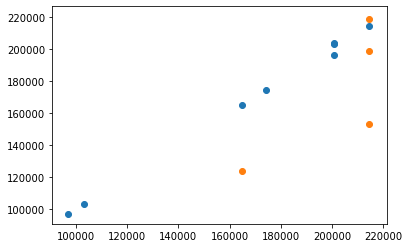

In [58]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_bikes = DecisionTreeRegressor(max_depth=3) # Fill in best max depth score here
decision_tree_bikes.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_bikes.predict(train_feature)

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(train_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))


test_prediction = decision_tree_bikes.predict(test_feature)

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))

# Scatter the predictions vs actual values, orange is predicted
plt.scatter(train_prediction, train_target, label='train')  # blue 
plt.scatter(test_prediction, test_target, label='test')  
plt.show()


In [59]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_feature, train_target)

# Look at the R^2 scores on train and test
print(rfr.score(train_feature, train_target))
print(rfr.score(test_feature, test_target))  # Try to attain a positive value

0.9598986552927099
0.16492102886550242


In [60]:
from sklearn.model_selection import ParameterGrid
import numpy as np

# Create a dictionary of hyperparameters to search
# n_estimators is the number of trees in the forest. The larger the better, but also takes longer it will take to compute. 
# Run grid search
#grid = {'n_estimators': [200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [13]}
grid = {'n_estimators': [200], 'max_depth': [5], 'max_features': [10], 'random_state': [13]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_feature, train_target)
    test_scores.append(rfr.score(test_feature, test_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])  

# The best test score

0.26921149824177437 {'random_state': 13, 'n_estimators': 200, 'max_features': 10, 'max_depth': 5}


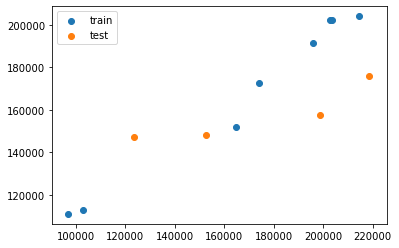

In [61]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=5, max_features = 10, random_state=13)
rfr.fit(train_feature, train_target)

# Make predictions with our model
train_prediction = rfr.predict(train_feature)
test_prediction = rfr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_target, train_prediction, label='train')
plt.scatter(test_target, test_prediction, label='test')
plt.legend()
plt.show()

In [62]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(train_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 4.1
Tree on test set MAE%: 16.1


In [63]:
# Random Forest Feature Importance
# get column names
df.columns

Index(['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1', 't'],
      dtype='object')

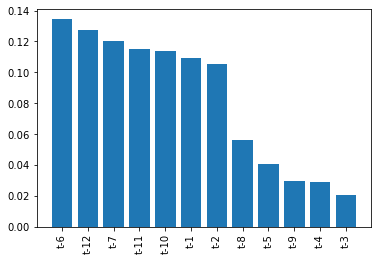

In [64]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [65]:
from sklearn.ensemble import GradientBoostingRegressor

# Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
# Create GB model -- hyperparameters 
gbr = GradientBoostingRegressor(max_features=7,
                                learning_rate=0.03,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=99)

gbr.fit(train_feature, train_target)

print(gbr.score(train_feature, train_target))
print(gbr.score(test_feature, test_target))

0.9975299385104397
0.21510453770320906


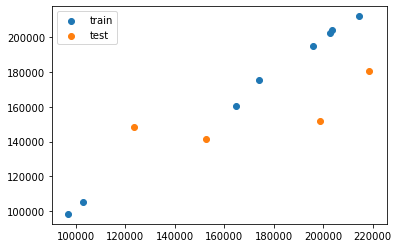

In [66]:
# Make predictions with our model
train_prediction = gbr.predict(train_feature)
test_prediction = gbr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_target, train_prediction, label='train')
plt.scatter(test_target, test_prediction, label='test')
plt.legend()
plt.show()

In [67]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(train_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))


Tree on train set MAE%: 1.0
Tree on test set MAE%: 17.4


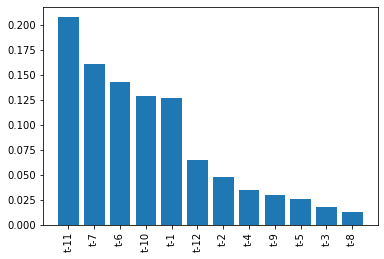

In [68]:
# Gradient Boosted Model Feature Importance
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x2 = range(X2.shape[1])

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]

plt.bar(x2, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

# 80-20 Data Split 

In [69]:
# Target(Y) Train-Test split

Y2 = y2
traintarget_size = int(len(Y2) * 0.80)   # Set split
print(traintarget_size)
train_target, test_target = Y2[:traintarget_size], Y2[traintarget_size:len(Y2)]

print('Observations for Target: %d' % (len(Y2)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

9
Observations for Target: 12
Training Observations for Target: 9
Testing Observations for Target: 3


In [70]:
# Features(X) Train-Test split

trainfeature_size = int(len(X2) * 0.80)
train_feature, test_feature = X2[:trainfeature_size], X2[trainfeature_size:len(X2)]
print('Observations for feature: %d' % (len(X2)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 12
Training Observations for feature: 9
Testing Observations for feature: 3


In [71]:
from sklearn.linear_model import LinearRegression
  
reg = LinearRegression() # Create a linear regression object
  
reg = reg.fit(train_feature, train_target) # Fit it to the training data
  
# Create two predictions for the training and test sets
train_prediction = reg.predict(train_feature)
test_prediction = reg.predict(test_feature)

In [72]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(train_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))


Tree on train set MAE%: 0.0
Tree on test set MAE%: 27.7


In [73]:
# Decision Tree Regression Model

from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_bikes = DecisionTreeRegressor()  # max_depth not set

# Fit the model to the training features and targets
decision_tree_bikes.fit(train_feature, train_target)

# Check the score on train and test
print(decision_tree_bikes.score(train_feature, train_target))
print(decision_tree_bikes.score(test_feature,test_target))  # predictions are horrible if negative value, no relationship if 0


1.0
-3.932343586481424


In [74]:
# Find Best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.

for d in [2,3,4,5,6,7,8,9,10]:
    # Create the tree and fit it
    decision_tree_bikes = DecisionTreeRegressor(max_depth=d)
    decision_tree_bikes.fit(train_feature, train_target)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_bikes.score(train_feature, train_target))
    print(decision_tree_bikes.score(test_feature, test_target), '\n')  # You want the test score to be positive
    
# R-square for train and test scores are below. 

max_depth= 2
0.9770839695288498
-3.9722627045937395 

max_depth= 3
0.9973556205045945
-1.1198837457373116 

max_depth= 4
0.9999821156283873
0.14700998425026246 

max_depth= 5
1.0
-0.18595528427494545 

max_depth= 6
1.0
-0.18595528427494545 

max_depth= 7
1.0
-3.9722627045937395 

max_depth= 8
1.0
-0.043719687716746725 

max_depth= 9
1.0
-3.1912877309128636 

max_depth= 10
1.0
-0.043719687716746725 



Tree on train set MAE%: 0.0
Tree on test set MAE%: 19.3


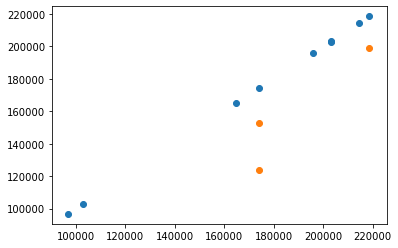

In [75]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree_bikes = DecisionTreeRegressor(max_depth=4) # Fill in best max depth score here
decision_tree_bikes.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree_bikes.predict(train_feature)

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(train_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))


test_prediction = decision_tree_bikes.predict(test_feature)

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))

# Scatter the predictions vs actual values, orange is predicted
plt.scatter(train_prediction, train_target, label='train')  # blue 
plt.scatter(test_prediction, test_target, label='test')  
plt.show()

In [76]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=400)
rfr.fit(train_feature, train_target)

# Look at the R^2 scores on train and test
print(rfr.score(train_feature, train_target))
print(rfr.score(test_feature, test_target))  # Try to attain a positive value

0.9525835723790039
0.21051659530846487


In [86]:
from sklearn.model_selection import ParameterGrid
import numpy as np

# Create a dictionary of hyperparameters to search
# n_estimators is the number of trees in the forest. The larger the better, but also takes longer it will take to compute. 
# Run grid search
#grid = {'n_estimators': [200], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [13]}
grid = {'n_estimators': [200], 'max_depth': [8], 'max_features': [12], 'random_state': [13]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_feature, train_target)
    test_scores.append(rfr.score(test_feature, test_target))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])  

# The best test score

0.3374026855567982 {'random_state': 13, 'n_estimators': 200, 'max_features': 12, 'max_depth': 8}


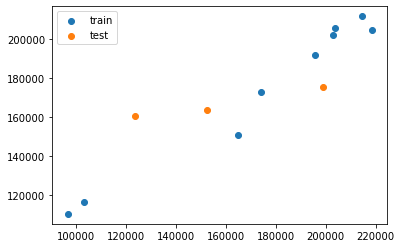

In [87]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=5, max_features = 10, random_state=13)
rfr.fit(train_feature, train_target)

# Make predictions with our model
train_prediction = rfr.predict(train_feature)
test_prediction = rfr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_target, train_prediction, label='train')
plt.scatter(test_target, test_prediction, label='test')
plt.legend()
plt.show()

In [88]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(train_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))

Tree on train set MAE%: 4.2
Tree on test set MAE%: 14.9


In [89]:
# Random Forest Feature Importance
# get column names
df.columns

Index(['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1', 't'],
      dtype='object')

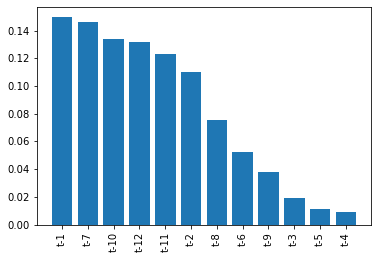

In [90]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [91]:
from sklearn.ensemble import GradientBoostingRegressor

# Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
# Create GB model -- hyperparameters 
gbr = GradientBoostingRegressor(max_features=7,
                                learning_rate=0.03,
                                n_estimators=300,
                                subsample=0.7,
                                random_state=99)

gbr.fit(train_feature, train_target)

print(gbr.score(train_feature, train_target))
print(gbr.score(test_feature, test_target))

0.99999117614946
0.363342276459404


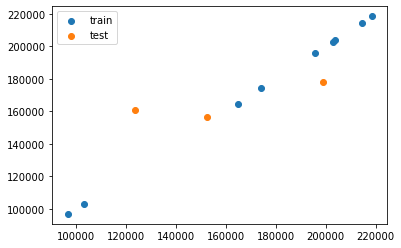

In [92]:
# Make predictions with our model
train_prediction = gbr.predict(train_feature)
test_prediction = gbr.predict(test_feature)

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_target, train_prediction, label='train')
plt.scatter(test_target, test_prediction, label='test')
plt.legend()
plt.show()

In [93]:
# Compute the MAE for both the training and test sets

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(train_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))

MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))


Tree on train set MAE%: 0.1
Tree on test set MAE%: 13.0


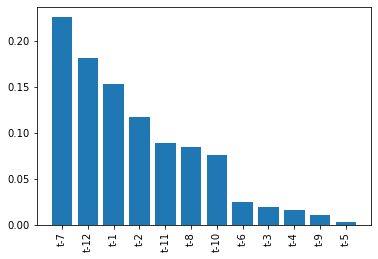

In [94]:
# Gradient Boosted Model Feature Importance
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x2 = range(X2.shape[1])

# Create tick labels 
feature_names = ['t-12', 't-11', 't-10', 't-9', 't-8', 't-7', 't-6', 't-5', 't-4', 't-3',
       't-2', 't-1']
labels = np.array(feature_names)[sorted_index]

plt.bar(x2, feature_importances[sorted_index], tick_label=labels)

# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()